**Dataset:** [Rush Kirubi, Kaggle](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings)

### Imports

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Global variables
year_range = "2010-2016"
figure_size = (10, 6)

## Data preparation

### Reading data

In [34]:
data = pd.read_csv('../datasets/sales_rush_kirubi.csv')
print(data.count())
data.head()

Name               16717
Platform           16719
Year_of_Release    16450
Genre              16717
Publisher          16665
NA_Sales           16719
EU_Sales           16719
JP_Sales           16719
Other_Sales        16719
Global_Sales       16719
Critic_Score        8137
Critic_Count        8137
User_Score         10015
User_Count          7590
Developer          10096
Rating              9950
dtype: int64


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning data

In [166]:
data_clean = data[data['Critic_Count'].notna()]
data_clean = data_clean[data_clean['User_Score'].notna()]
data_clean = data_clean[data_clean['User_Score'] != 'tbd']
data_clean = data_clean[data_clean['Developer'].notna()]
data_clean = data_clean[data_clean['Developer'].notna()]
data_clean = data_clean[data_clean['Rating'].notna()]
data_clean = data_clean[data_clean['Publisher'].notna()]
data_clean = data_clean[data_clean['Year_of_Release'].notna()]
data_clean[data_clean.columns[-4]] = data_clean['User_Score'].astype(float)
data_clean.count()

Name               6825
Platform           6825
Year_of_Release    6825
Genre              6825
Publisher          6825
NA_Sales           6825
EU_Sales           6825
JP_Sales           6825
Other_Sales        6825
Global_Sales       6825
Critic_Score       6825
Critic_Count       6825
User_Score         6825
User_Count         6825
Developer          6825
Rating             6825
dtype: int64

In [36]:
# filtering to the period of 2010 to 2016
print(data_clean['Year_of_Release'].describe())
data_2010_2016 = data_clean[data_clean['Year_of_Release'] >= 2010]
data_2010_2016.describe()

count    6825.000000
mean     2007.436777
std         4.211248
min      1985.000000
25%      2004.000000
50%      2007.000000
75%      2011.000000
max      2016.000000
Name: Year_of_Release, dtype: float64


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000
mean,2012.440805,0.393280,0.295073,0.058479,0.094871,0.841788,71.216659,33.200281,359.293870
std,1.973936,0.849488,0.628733,0.202921,0.207301,1.645649,13.402210,22.752004,871.933007
min,2010.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2011.000000,0.050000,0.030000,0.000000,0.010000,0.130000,64.000000,14.000000,26.000000
50%,2012.000000,0.140000,0.100000,0.000000,0.030000,0.320000,74.000000,28.000000,79.000000
75%,2014.000000,0.390000,0.290000,0.040000,0.090000,0.870000,81.000000,48.000000,289.000000
max,2016.000000,15.000000,9.090000,4.390000,3.960000,21.810000,97.000000,113.000000,10665.000000


## Genre analysis

### Count by genre

In [37]:
data_count_by_genre = data_2010_2016.groupby('Genre')['Name'].count()
data_count_by_genre = data_count_by_genre[data_count_by_genre.index != 'Misc']
data_count_by_genre = data_count_by_genre.sort_values(ascending=False)
data_count_by_genre

Genre
Action          661
Shooter         291
Role-Playing    250
Sports          237
Racing          135
Fighting        120
Platform         94
Adventure        77
Simulation       68
Strategy         60
Puzzle           20
Name: Name, dtype: int64

/var/folders/hk/vc7_d06j5yq99t_fqllsqsxc0000gn/T/ipykernel_41264/1107927720.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_count_by_genre.index, rotation=45)
/var/folders/hk/vc7_d06j5yq99t_fqllsqsxc0000gn/T/ipykernel_41264/1107927720.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


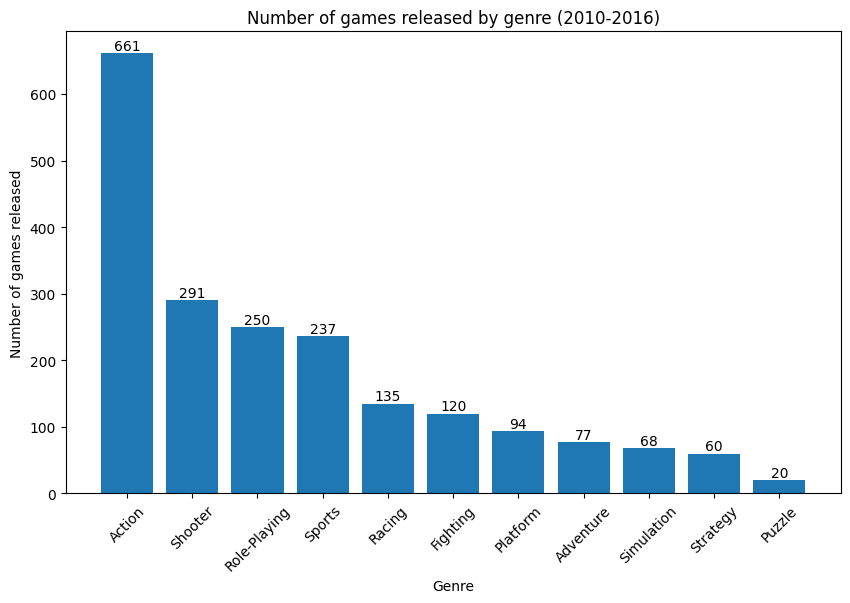

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_container = ax.bar(data_count_by_genre.index, data_count_by_genre)
ax.set(xlabel='Genre', ylabel='Number of games released')
ax.set(title=f'Number of games released by genre ({year_range})')
ax.set_xticklabels(data_count_by_genre.index, rotation=45)
ax.bar_label(bar_container)
fig.show()

### Sales by genre

Chosen genres:
* Action
* Shooter
* Role-playing
* Sport

In [39]:
chosen_genres = ['Shooter', 'Role-Playing', 'Sports']

In [40]:
data_2010_2016.groupby('Genre')['Global_Sales'].describe().loc[chosen_genres]

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Shooter,291.0,1.403918,2.443469,0.01,0.20,0.560,1.46,14.73
Role-Playing,250.0,0.696400,1.156710,0.01,0.12,0.265,0.77,8.79
Sports,237.0,0.956456,1.268947,0.01,0.22,0.510,1.09,8.57


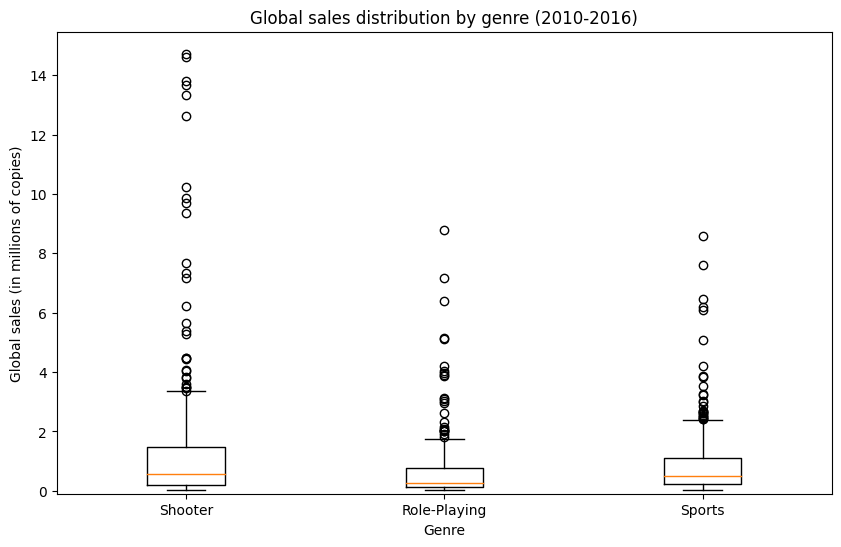

In [41]:
plt.figure(figsize=(10, 6))
plt.boxplot([data_2010_2016[data_2010_2016['Genre'] == genre]['Global_Sales'] for genre in chosen_genres],
            labels=chosen_genres)
plt.xlabel('Genre')
plt.ylabel('Global sales (in millions of copies)')
plt.ylim(bottom=-0.1)
plt.title(f'Global sales distribution by genre ({year_range})')
plt.show()

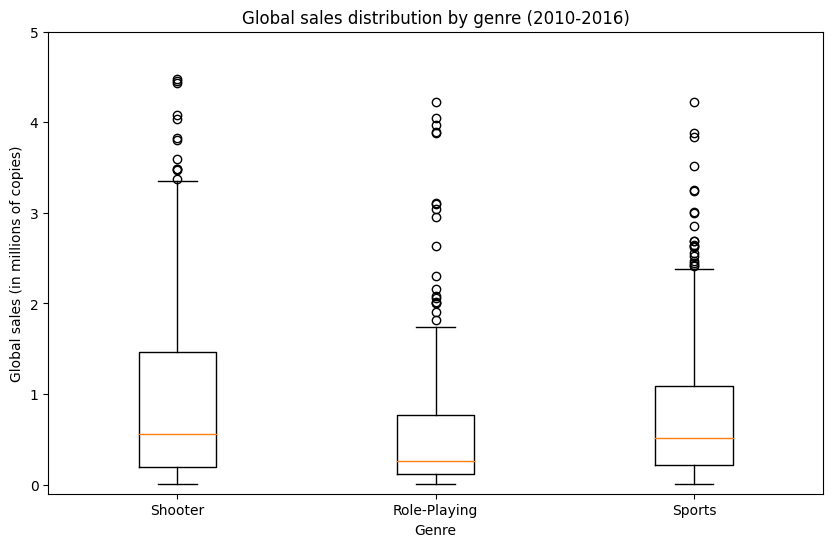

In [42]:
# scoped chart
plt.figure(figsize=(10, 6))
plt.boxplot([data_2010_2016[data_2010_2016['Genre'] == genre]['Global_Sales'] for genre in chosen_genres],
            labels=chosen_genres)
plt.xlabel('Genre')
plt.ylabel('Global sales (in millions of copies)')
plt.ylim(bottom=-0.1, top=5)
plt.title(f'Global sales distribution by genre ({year_range})')
plt.show()

## Region analysis

### Sales by region

In [43]:
region_sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
region_labels = ['North America', 'EU', 'Japan', 'Others']

In [44]:
data_shooter = data_2010_2016[data_2010_2016['Genre'] == 'Shooter']

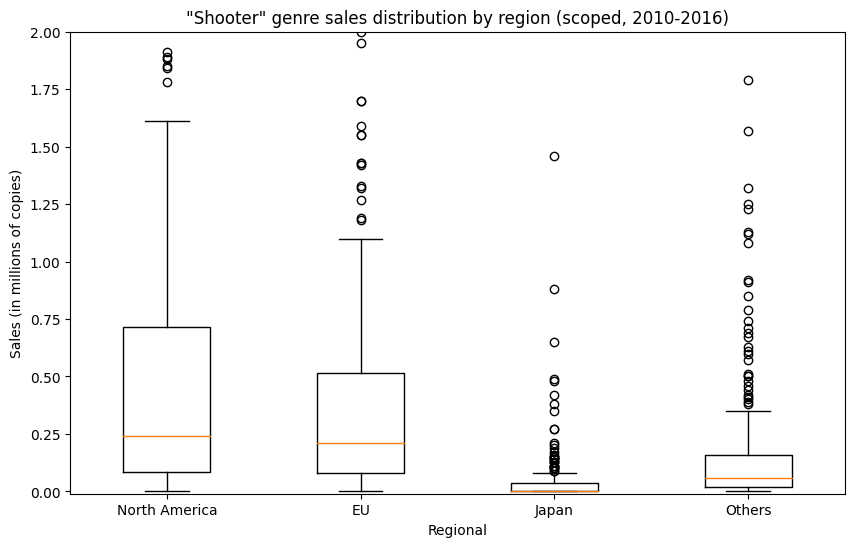

In [45]:
plt.figure(figsize=figure_size)
plt.boxplot([data_shooter[region] for region in region_sales],
            labels=region_labels)
plt.xlabel('Regional')
plt.ylabel('Sales (in millions of copies)')
plt.ylim(bottom=-0.01, top=2)
plt.title(f'"Shooter" genre sales distribution by region (scoped, {year_range})')
plt.show()

In [46]:
data_shooter_sales_total_by_region = data_shooter.iloc[:, 5:9].sum(axis=0)
data_shooter_sales_total_by_region

NA_Sales       203.81
EU_Sales       145.11
JP_Sales        11.90
Other_Sales     47.71
dtype: float64

In [47]:
def label_format(labels):
    return [f'{label}\n({"{:.2f}".format(sales)} million copies)' for label, sales in zip(labels, data_shooter_sales_total_by_region)]

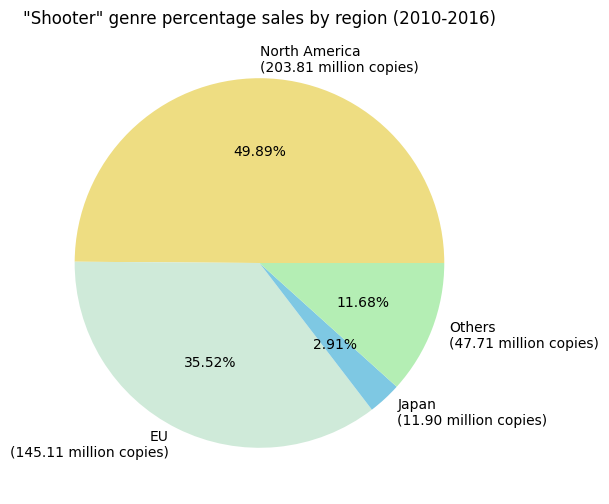

In [48]:
plt.figure(figsize=figure_size)
plt.pie(data_shooter_sales_total_by_region,
        labels=label_format(['North America', 'EU', 'Japan', 'Others']),
        colors=['#eedd82', '#cfead9', '#7EC8E3', '#b4eeb4'],
        autopct='%.2f%%')
plt.title(f'"Shooter" genre percentage sales by region ({year_range})')
plt.show()

### Sales in NA region

In [49]:
data_sales_prop_by_year = data_2010_2016.iloc[:, [2, 5, 6, 7, 8, 9]]
data_sales_prop_by_year.insert(data_sales_prop_by_year.columns.size, 'NA_Sales_Prop',
                               data_sales_prop_by_year['NA_Sales'] / data_sales_prop_by_year['Global_Sales'] * 100)
data_sales_prop_by_year.insert(data_sales_prop_by_year.columns.size, 'EU_Sales_Prop',
                               data_sales_prop_by_year['EU_Sales'] / data_sales_prop_by_year['Global_Sales'] * 100)
data_sales_prop_by_year.insert(data_sales_prop_by_year.columns.size, 'JP_Sales_Prop',
                               data_sales_prop_by_year['JP_Sales'] / data_sales_prop_by_year['Global_Sales'] * 100)
data_sales_prop_by_year

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales_Prop,EU_Sales_Prop,JP_Sales_Prop
14,2010.0,15.00,4.89,0.24,1.69,21.81,68.775791,22.420908,1.100413
16,2013.0,7.02,9.09,0.98,3.96,21.04,33.365019,43.203422,4.657795
23,2013.0,9.66,5.14,0.06,1.41,16.27,59.373079,31.591887,0.368777
29,2011.0,9.04,4.24,0.13,1.32,14.73,61.371351,28.784793,0.882553
32,2010.0,9.70,3.68,0.11,1.13,14.61,66.392882,25.188227,0.752909
...,...,...,...,...,...,...,...,...,...
16634,2016.0,0.00,0.01,0.00,0.00,0.01,0.000000,100.000000,0.000000
16656,2016.0,0.00,0.01,0.00,0.00,0.01,0.000000,100.000000,0.000000
16696,2014.0,0.00,0.01,0.00,0.00,0.01,0.000000,100.000000,0.000000
16700,2011.0,0.01,0.00,0.00,0.00,0.01,100.000000,0.000000,0.000000


In [50]:
data_sales_prop_by_year_na = data_sales_prop_by_year[['Year_of_Release', 'NA_Sales_Prop', 'Global_Sales']]
data_sales_prop_by_year_na = data_sales_prop_by_year_na.sort_values(by='Global_Sales', ascending=False)
data_sales_prop_by_year_na = data_sales_prop_by_year_na.iloc[:1000]
data_sales_prop_by_year_na

,Year_of_Release,NA_Sales_Prop,Global_Sales
14,2010.0,68.775791,21.81
16,2013.0,33.365019,21.04
23,2013.0,59.373079,16.27
29,2011.0,61.371351,14.73
32,2010.0,66.392882,14.61
...,...,...,...
4967,2013.0,57.894737,0.38
5150,2012.0,67.567568,0.37
5131,2016.0,10.810811,0.37
5113,2010.0,24.324324,0.37


Text(0.5, 1.0, 'NA sales proportion distribution by year (2010-2016)')

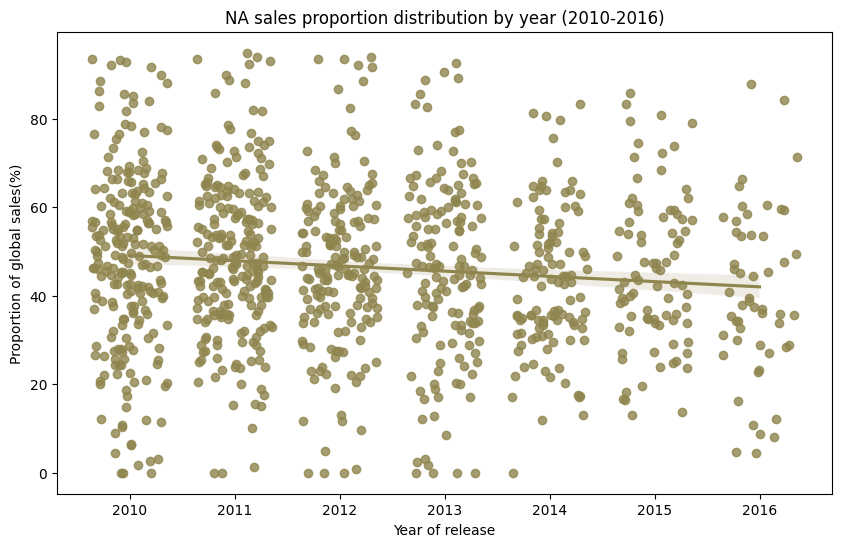

In [51]:
fig, ax = plt.subplots(figsize=figure_size)
sns.regplot(x='Year_of_Release', y='NA_Sales_Prop', data=data_sales_prop_by_year_na,
           robust=True, x_jitter=0.36, ax=ax, color='#8f854e')
ax.set(xlabel='Year of release', ylabel='Proportion of global sales(%)')
ax.set_title(f'NA sales proportion distribution by year ({year_range})')

### Sales in EU region

In [52]:
data_sales_prop_by_year_eu = data_sales_prop_by_year[['Year_of_Release', 'EU_Sales_Prop', 'Global_Sales']]
data_sales_prop_by_year_eu = data_sales_prop_by_year_eu.sort_values(by='Global_Sales', ascending=False)
data_sales_prop_by_year_eu = data_sales_prop_by_year_eu.iloc[:1000]
data_sales_prop_by_year_eu

,Year_of_Release,EU_Sales_Prop,Global_Sales
14,2010.0,22.420908,21.81
16,2013.0,43.203422,21.04
23,2013.0,31.591887,16.27
29,2011.0,28.784793,14.73
32,2010.0,25.188227,14.61
...,...,...,...
4967,2013.0,34.210526,0.38
5150,2012.0,24.324324,0.37
5131,2016.0,72.972973,0.37
5113,2010.0,48.648649,0.37


Text(0.5, 1.0, 'EU sales proportion distribution by year (2010-2016)')

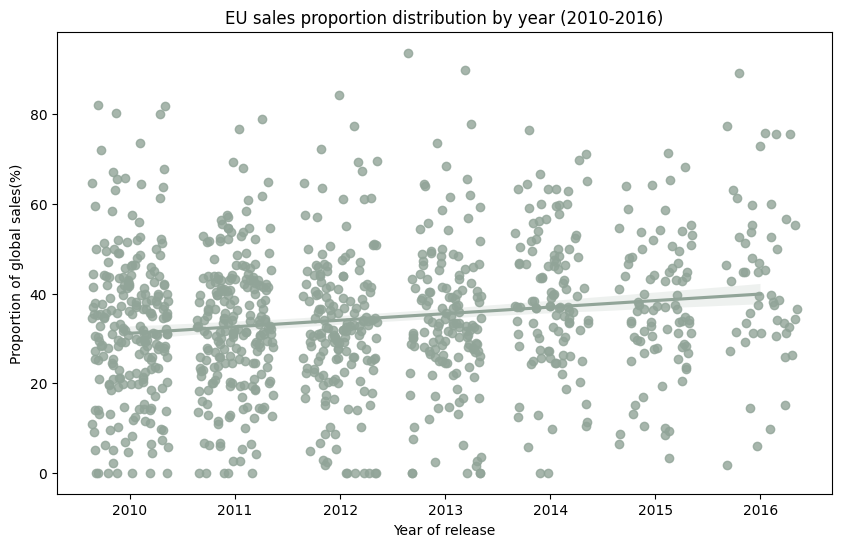

In [53]:
fig, ax = plt.subplots(figsize=figure_size)
sns.regplot(x='Year_of_Release', y='EU_Sales_Prop', data=data_sales_prop_by_year_eu,
           robust=True, x_jitter=0.36, ax=ax, color='#91a498')
ax.set(xlabel='Year of release', ylabel='Proportion of global sales(%)')
ax.set_title(f'EU sales proportion distribution by year ({year_range})')

### Sales in JP region

In [54]:
data_sales_prop_by_year_jp = data_sales_prop_by_year[['Year_of_Release', 'JP_Sales_Prop', 'Global_Sales']]
data_sales_prop_by_year_jp = data_sales_prop_by_year_jp.sort_values(by='Global_Sales', ascending=False)
data_sales_prop_by_year_jp = data_sales_prop_by_year_jp.iloc[:1000]
data_sales_prop_by_year_jp

,Year_of_Release,JP_Sales_Prop,Global_Sales
14,2010.0,1.100413,21.81
16,2013.0,4.657795,21.04
23,2013.0,0.368777,16.27
29,2011.0,0.882553,14.73
32,2010.0,0.752909,14.61
...,...,...,...
4967,2013.0,0.000000,0.38
5150,2012.0,0.000000,0.37
5131,2016.0,0.000000,0.37
5113,2010.0,2.702703,0.37


Text(0.5, 1.0, 'JP sales proportion distribution by year (2010-2016)')

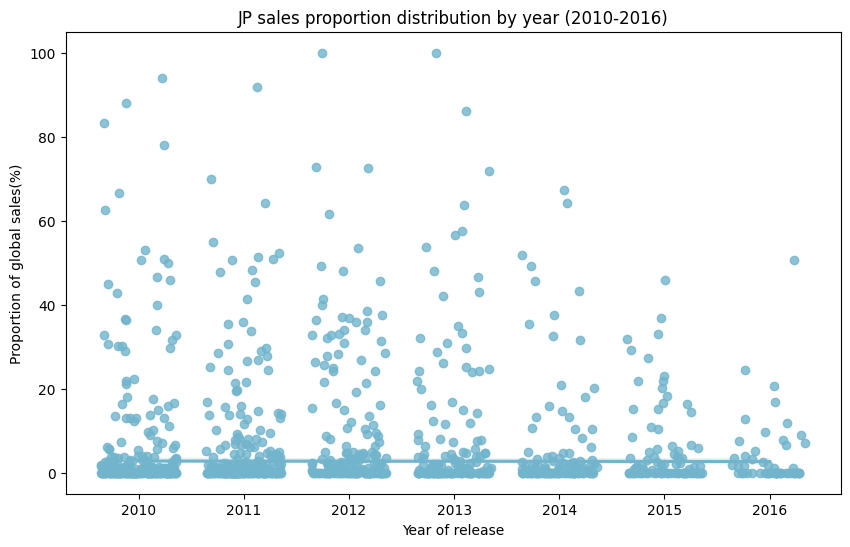

In [55]:
fig, ax = plt.subplots(figsize=figure_size)
sns.regplot(x='Year_of_Release', y='JP_Sales_Prop', data=data_sales_prop_by_year_jp,
           robust=True, x_jitter=0.36, ax=ax, color='#71b4cc')
ax.set(xlabel='Year of release', ylabel='Proportion of global sales(%)')
ax.set_title(f'JP sales proportion distribution by year ({year_range})')

## Platform analysis

### EU sales by platform

In [231]:
data_platform_collapsed = data_2010_2016.copy(deep=True)
data_platform_collapsed.loc[data_2010_2016['Platform'] == 'PS2', 'Platform'] = 'Others'
data_platform_collapsed.loc[data_2010_2016['Platform'] == 'PSP', 'Platform'] = 'Others'
data_platform_collapsed.loc[data_2010_2016['Platform'] == 'PSV', 'Platform'] = 'Others'
data_platform_collapsed.loc[data_2010_2016['Platform'] == 'DS', 'Platform'] = 'Others'
data_eu_sales_by_platform = data_platform_collapsed.groupby('Platform')['EU_Sales'].sum().sort_values(ascending=False)
data_eu_sales_by_platform

Platform
PS3       170.78
X360      137.57
PS4       111.78
PC         57.75
XOne       42.02
Wii        36.65
3DS        33.33
WiiU       20.42
Others     20.27
Name: EU_Sales, dtype: float64

In [57]:
def label_format(labels, data):
    return [f'{label}\n({"{:.2f}".format(sales)} million copies)' for label, sales in zip(labels, data)]

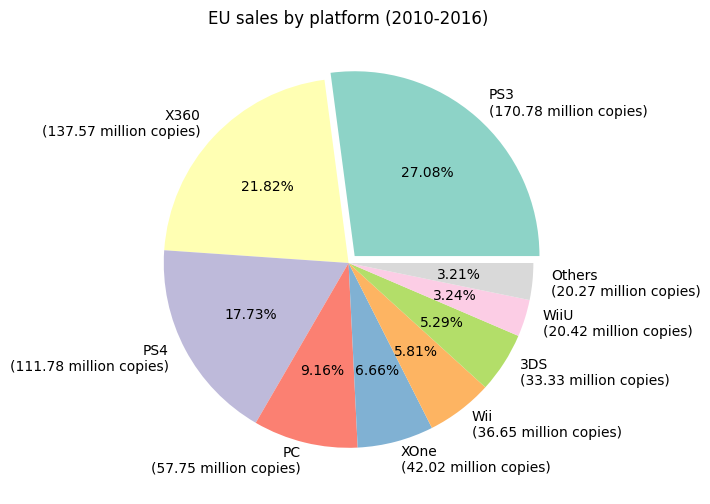

In [58]:
explode = [0.] * data_eu_sales_by_platform.size
explode[0] = 0.05

plt.figure(figsize=figure_size)
plt.pie(data_eu_sales_by_platform,
        labels=label_format(data_eu_sales_by_platform.index.tolist(), data_eu_sales_by_platform),
        explode=explode, colors=plt.cm.Set3.colors, autopct='%.2f%%')
plt.title(f'EU sales by platform ({year_range})')
plt.show()

### User scores by platform

In [168]:
data_2004_2016 = data_clean[data_clean['Year_of_Release'] >= 2004]
data_2004_2016.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000
mean,2008.883901,0.394064,0.241102,0.061290,0.090265,0.786922,69.777737,31.215087,7.044931,203.157498
std,3.381784,1.026840,0.736859,0.290226,0.295884,2.093971,13.703815,20.245010,1.433524,644.849768
min,2004.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2006.000000,0.060000,0.010000,0.000000,0.010000,0.110000,62.000000,15.000000,6.300000,13.000000
50%,2008.000000,0.150000,0.050000,0.000000,0.020000,0.290000,72.000000,28.000000,7.400000,32.000000
75%,2011.000000,0.385000,0.210000,0.020000,0.080000,0.750000,80.000000,43.000000,8.100000,110.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.500000,10665.000000


In [217]:
data_shooter_user = data_2004_2016[data_2004_2016['Genre'] == 'Shooter'][['Platform', 'User_Score', 'User_Count']]
data_shooter_user.describe()

,User_Score,User_Count
count,704.000000,704.000000
mean,6.967187,462.372159
std,1.510547,1039.535668
min,1.200000,4.000000
25%,6.200000,26.000000
50%,7.400000,88.500000
75%,8.100000,412.500000
max,9.300000,9851.000000


In [227]:
data_shooter_user_stats = data_shooter_user.groupby('Platform')[['User_Score', 'User_Count']].describe()
# data_shooter_user_stats = data_shooter_user_stats.sort_values(by=[('User_Score', 'max'), ('User_Score', 'count')], ascending=True)
data_shooter_user_stats

User_Score                                                    \
              count      mean       std  min    25%   50%    75%  max   
Platform                                                                
3DS             2.0  7.950000  0.353553  7.7  7.825  7.95  8.075  8.2   
DS             27.0  7.222222  0.931225  5.0  6.900  7.40  7.900  8.4   
GBA             3.0  8.000000  0.700000  7.2  7.750  8.30  8.400  8.5   
GC             17.0  7.200000  2.284185  1.4  6.700  8.10  8.500  9.1   
PC            120.0  6.853333  1.617391  2.5  5.900  7.40  8.000  9.3   
PS2            64.0  7.656250  1.307958  3.4  7.000  8.10  8.525  9.2   
PS3           121.0  6.590909  1.506597  1.7  6.000  6.90  7.700  8.7   
PS4            33.0  6.651515  1.433336  3.4  6.100  6.90  7.800  8.5   
PSP            30.0  7.686667  0.875227  6.0  7.125  7.80  8.300  9.1   
PSV             5.0  7.640000  0.770065  6.8  7.400  7.50  7.600  8.9   
Wii            29.0  6.886207  1.821837  1.8  5.800  7.60  8.200  9.3   
WiiU            5.0  6.400000  1.937782  3.4  5.800  6.90  7.400  8.5   
X360          153.0  6.781046  1.459215  1.2  6.100  7.10  7.800  8.9   
XB             65.0  7.446154  1.401013  2.8  7.000  7.90  8.500  9.2   
XOne           30.0  6.540000  1.345132  3.1  5.525  6.75  7.650  8.3   

         User_Count                                                           \
              count         mean          std    min     25%    50%      75%   
Platform                                                                       
3DS             2.0   124.500000   150.613744   18.0   71.25  124.5   177.75   
DS             27.0    27.259259    35.240484    4.0    8.50   19.0    29.00   
GBA             3.0    12.333333     2.081666   10.0   11.50   13.0    13.50   
GC             17.0    34.117647    67.568375    5.0    8.00   13.0    15.00   
PC            120.0  1196.808333  1735.290324   16.0  223.75  557.0  1268.50   
PS2            64.0    44.203125    54.170858    5.0   12.75   24.5    51.00   
PS3           121.0   323.173554   623.288011   10.0   41.00   92.0   294.00   
PS4            33.0  1133.454545  1532.588845   13.0  178.00  795.0  1443.00   
PSP            30.0    38.766667    29.497730    4.0   14.75   30.5    47.00   
PSV             5.0   411.000000   238.858745  169.0  245.00  358.0   513.00   
Wii            29.0    89.655172   128.840787    5.0   11.00   31.0    87.00   
WiiU            5.0   472.000000   459.510609   30.0  228.00  256.0   662.00   
X360          153.0   467.209150   960.408998    4.0   59.00  128.0   404.00   
XB             65.0    44.015385   150.156740    4.0    9.00   16.0    29.00   
XOne           30.0   614.400000   652.776489   34.0  254.25  395.0   692.00   

                  
             max  
Platform          
3DS        231.0  
DS         188.0  
GBA         14.0  
GC         279.0  
PC        9851.0  
PS2        268.0  
PS3       5234.0  
PS4       7064.0  
PSP        118.0  
PSV        770.0  
Wii        491.0  
WiiU      1184.0  
X360      8713.0  
XB        1218.0  
XOne      2658.0

In [264]:
data_shooter_user_stats.loc[['XOne', 'X360', 'WiiU', 'Wii', 'PS4', 'PS3', 'PC'], 'User_Score']

,count,mean,std,min,25%,50%,75%,max
Platform,,,,,,,,
XOne,30.0,6.540000,1.345132,3.1,5.525,6.75,7.65,8.3
X360,153.0,6.781046,1.459215,1.2,6.100,7.10,7.80,8.9
WiiU,5.0,6.400000,1.937782,3.4,5.800,6.90,7.40,8.5
Wii,29.0,6.886207,1.821837,1.8,5.800,7.60,8.20,9.3
PS4,33.0,6.651515,1.433336,3.4,6.100,6.90,7.80,8.5
PS3,121.0,6.590909,1.506597,1.7,6.000,6.90,7.70,8.7
PC,120.0,6.853333,1.617391,2.5,5.900,7.40,8.00,9.3


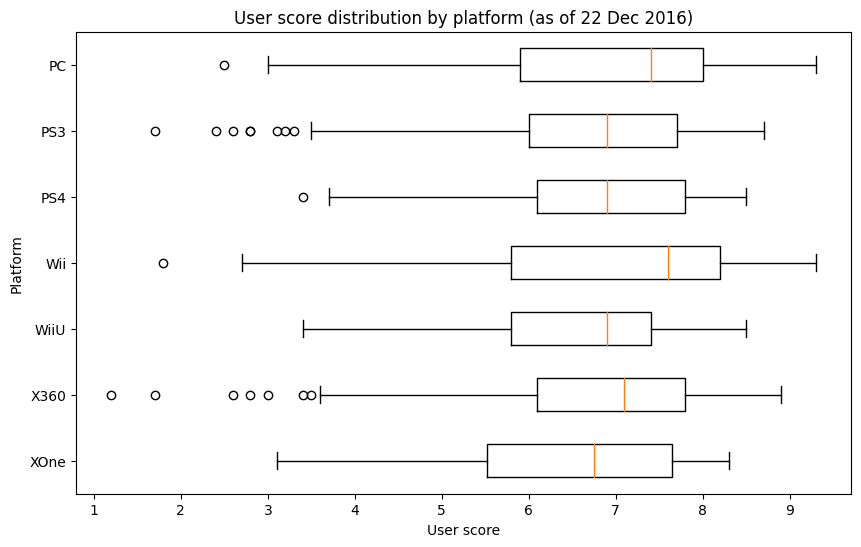

In [230]:
chosen_platforms = ['XOne', 'X360', 'WiiU', 'Wii', 'PS4', 'PS3', 'PC']

plt.figure(figsize=figure_size)
plt.boxplot([data_shooter_user[data_shooter_user['Platform'] == p]['User_Score'] for p in chosen_platforms],
            labels=chosen_platforms, vert=False)
plt.xlabel('User score')
plt.ylabel('Platform')
plt.title('User score distribution by platform (as of 22 Dec 2016)')
plt.show()

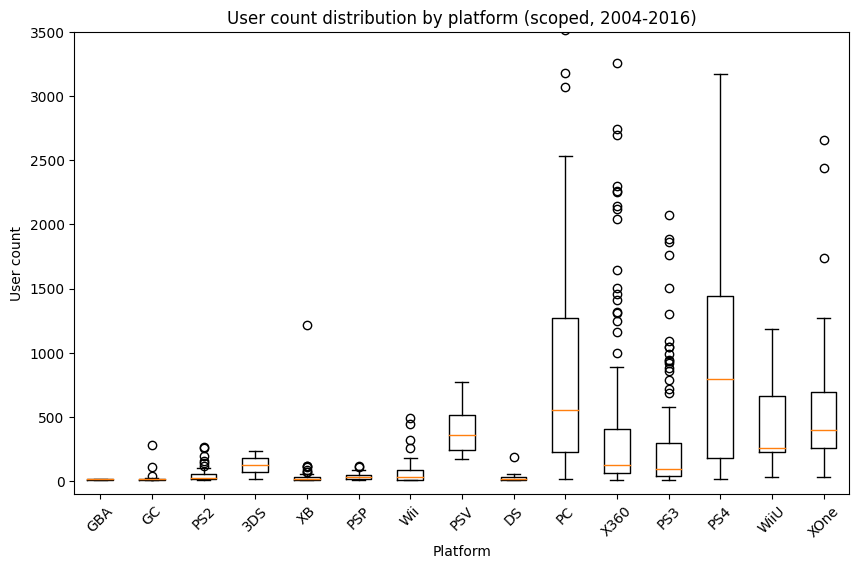

In [180]:
plt.figure(figsize=figure_size)
plt.boxplot([data_shooter_user[data_shooter_user['Platform'] == p]['User_Count'] for p in data_shooter_user_stats.index],
            labels=data_shooter_user_stats.index.tolist())
plt.xticks(rotation=45)
plt.xlabel('Platform')
plt.ylabel('User count')
plt.ylim(bottom=-100, top=3500)
plt.title('User count distribution by platform (scoped, 2004-2016)')
plt.show()

In [249]:
data_platform_collapsed_2 = data_platform_collapsed.copy(deep=True)
data_platform_collapsed_2.loc[data_platform_collapsed_2['Platform'] == '3DS', 'Platform'] = 'Others'
data_eu_sales_by_platform = data_platform_collapsed_2.groupby('Platform')['EU_Sales'].sum()
data_count_by_platform = data_platform_collapsed_2.groupby('Platform')['Name'].count()
print(data_eu_sales_by_platform)
print(data_count_by_platform)

Platform
Others     53.60
PC         57.75
PS3       170.78
PS4       111.78
Wii        36.65
WiiU       20.42
X360      137.57
XOne       42.02
Name: EU_Sales, dtype: float64
Platform
Others    369
PC        316
PS3       453
PS4       239
Wii        97
WiiU       89
X360      415
XOne      159
Name: Name, dtype: int64


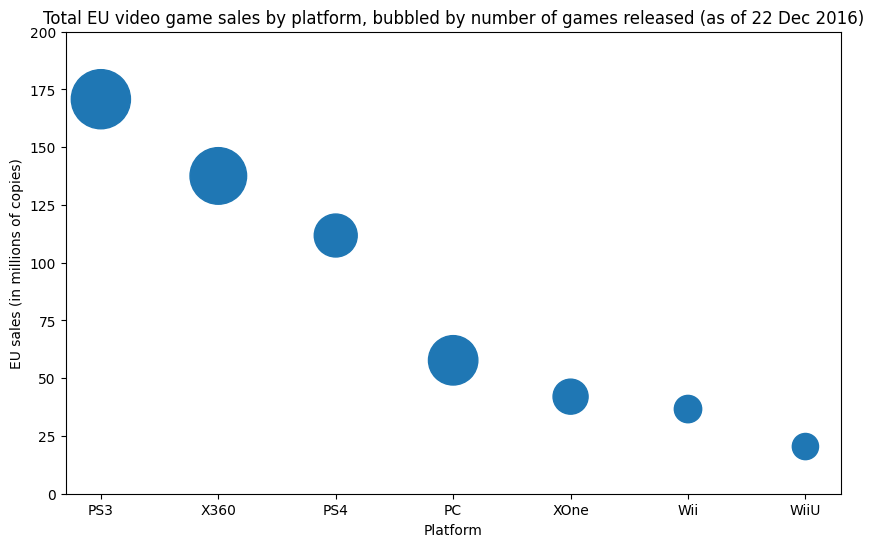

In [254]:
chosen_platforms = ['PS3', 'X360', 'PS4', 'PC', 'XOne', 'Wii', 'WiiU']

plt.figure(figsize=figure_size)
plt.scatter(chosen_platforms, [data_eu_sales_by_platform[p] for p in chosen_platforms],
            [data_count_by_platform[p] * 4 for p in chosen_platforms])

plt.xlabel('Platform')
plt.ylim(0, 200)
plt.ylabel('EU sales (in millions of copies)')
plt.title('Total EU video game sales by platform, bubbled by number of games released (as of 22 Dec 2016)')
plt.show()

In [256]:
data_platform_collapsed_shooter = data_platform_collapsed_2[data_platform_collapsed_2['Genre'] == 'Shooter']
data_eu_sales_by_platform_shooter = data_platform_collapsed_shooter.groupby('Platform')['EU_Sales'].sum()
data_count_by_platform_shooter = data_platform_collapsed_shooter.groupby('Platform')['Name'].count()
print(data_eu_sales_by_platform_shooter)
print(data_count_by_platform_shooter)

Platform
Others     2.07
PC        12.48
PS3       43.56
PS4       28.71
Wii        0.90
WiiU       1.57
X360      41.84
XOne      13.98
Name: EU_Sales, dtype: float64
Platform
Others    11
PC        65
PS3       68
PS4       33
Wii        5
WiiU       5
X360      74
XOne      30
Name: Name, dtype: int64


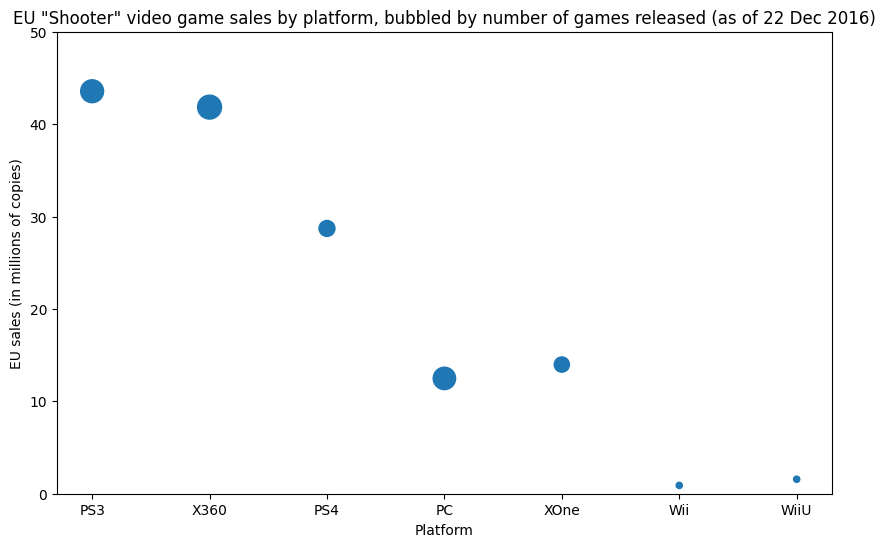

In [260]:
chosen_platforms = ['PS3', 'X360', 'PS4', 'PC', 'XOne', 'Wii', 'WiiU']

plt.figure(figsize=figure_size)
plt.scatter(chosen_platforms, [data_eu_sales_by_platform_shooter[p] for p in chosen_platforms],
            [data_count_by_platform_shooter[p] * 4 for p in chosen_platforms])

plt.xlabel('Platform')
plt.ylim(0, 50)
plt.ylabel('EU sales (in millions of copies)')
plt.title('EU "Shooter" video game sales by platform, bubbled by number of games released (as of 22 Dec 2016)')
plt.show()